Semih KARACAOĞLU
17050111008
Machine Learning Hw4


# Synthetic data generation

Generating some data on the plane with some amount of noise

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import e

# create synthetic data
n = 1000;
xRange = 6;
x = np.random.normal(0, 1, n)

noiseLevel = 0.1;
noise = np.random.normal(0, 1, n)*noiseLevel;
y = np.log(10 * (x**2) + 1) + noise
# y = np.log((10*x**2+1)**(np.log10(math.e))) + noise

print("Shape of x is ", x.shape)
x

Shape of x is  (1000,)


array([-1.00385836e+00,  1.15250943e+00,  7.06859564e-01,  3.27793355e-01,
        6.57884056e-01, -6.20725207e-01,  1.94171820e-01,  3.34221122e-01,
        9.41929573e-02, -1.89955970e-01, -6.70906759e-01, -9.40625226e-01,
        9.03623390e-01, -2.14822748e+00, -5.75700000e-01, -1.28331643e+00,
       -5.36913963e-01,  9.41047306e-01,  1.10099223e+00, -1.56327167e+00,
        1.34450754e+00,  4.35308380e-01,  7.85271098e-01,  7.11771847e-01,
        8.75751291e-01, -4.91618384e-01,  9.32784715e-01,  1.04836809e+00,
       -5.42174442e-01,  8.34358141e-01, -1.29712492e+00,  2.30438243e-01,
        4.62009853e-01,  3.17142686e-01,  1.20871989e+00,  1.05994599e+00,
        1.01025729e+00,  1.11161342e-01,  6.36089111e-01,  6.76469581e-01,
        8.69022859e-01, -1.30423087e-01, -2.56947375e-01, -1.11933962e+00,
        3.84759615e-01,  4.79424016e-01,  1.02816917e+00,  6.99224331e-02,
        1.05784157e+00, -8.15562180e-01, -1.07826028e+00,  3.32101022e-03,
        2.88916107e-01,  

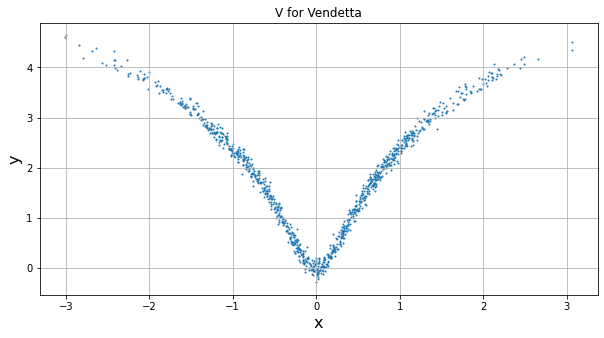

In [2]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 1)
plt.title('V for Vendetta')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid()
plt.show()

# Polynomial regression without Scikit-learn: A manual approach

$ e^Y = \beta_{1}*x^2 + \beta_{0} $

EXPLANATION: First, I converted a non-linear equation to linear. For this, it was necessary to get rid of the log. I put the Eular value as e^y on the left side of the equation, then I changed the term x^2, which is the factor of the constant number B1, to x1 and a linear equation appeared. Then I plotted the most compatible line by estimating the B0 and B1 values with the program.

In [3]:
x1 = x**2

Linear Regression on x1 (in mapped higher dimension space)

In [4]:
X = x1
X_b = np.c_[np.ones((n, 1)), X]
X_b

array([[1.        , 1.0077316 ],
       [1.        , 1.32827799],
       [1.        , 0.49965044],
       ...,
       [1.        , 0.47368307],
       [1.        , 0.24736676],
       [1.        , 0.00788875]])

In [5]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(np.exp(y))
print('[beta0, beta1] = ', w_estimate)

[beta0, beta1] =  [ 1.02337558 10.01858371]


In [6]:
y_hat = np.log(X_b.dot(w_estimate))
y_hat

array([2.40869304, 2.66241385, 1.79660859, 0.74186935, 1.67887687,
       1.58586908, 0.33725992, 0.76196825, 0.10639721, 0.32561266,
       1.71071194, 2.29127904, 2.21962754, 3.8556209 , 1.46875868,
       2.86351383, 1.36392064, 2.29208345, 2.57777001, 3.23895191,
       2.95146553, 1.07221045, 1.97426743, 1.80812188, 2.16413091,
       1.23685232, 2.27628406, 2.48778226, 1.37835532, 2.07917248,
       2.88368131, 0.44172005, 1.15116469, 0.70854776, 2.75114572,
       2.50789938, 2.42023837, 0.13730123, 1.62471823, 1.72419248,
       2.1505309 , 0.17713606, 0.52165995, 2.60829405, 0.91889786,
       1.20180672, 2.45224049, 0.06985987, 2.5042565 , 2.0395505 ,
       2.53935018, 0.02321452, 0.62038936, 1.77323188, 0.41309565,
       0.20574606, 3.41808856, 1.77409283, 2.97911593, 2.03717094,
       1.01302762, 0.02948308, 2.51526184, 4.14769104, 0.90153771,
       2.36620048, 2.16439167, 2.43570731, 0.83206402, 2.3294891 ,
       0.69657063, 0.49127568, 2.89721425, 0.21808705, 1.12262

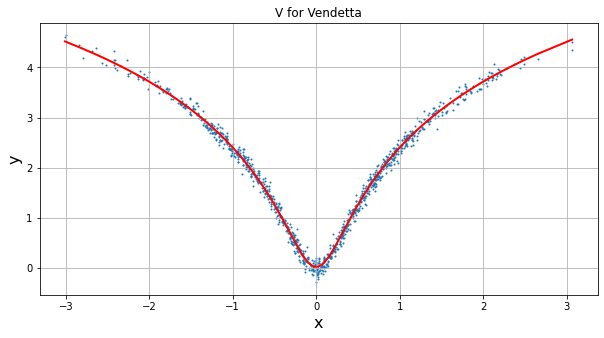

In [7]:
import operator
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 1)
L = sorted(zip(x,y_hat), key=operator.itemgetter(0))
new_x, new_y = zip(*L)
plt.plot(new_x, new_y, color='red', linewidth=2)
plt.title('V for Vendetta')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid() 
plt.show()

Finding best_m

# Polynomial regression with Scikit-learn: A manual approach

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_input = x[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)
print(x_mapped)

[[ 1.         -1.00385836  1.0077316 ]
 [ 1.          1.15250943  1.32827799]
 [ 1.          0.70685956  0.49965044]
 ...
 [ 1.          0.68824638  0.47368307]
 [ 1.         -0.49735979  0.24736676]
 [ 1.         -0.08881866  0.00788875]]


In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_mapped, np.exp(y))

# Predicting values using our trained model
y_hat = np.log(regressor.predict(x_mapped))
print(y_hat)

[2.41886143 2.65313281 1.78353688 0.72572944 1.66526532 1.60067042
 0.3242129  0.74579757 0.1003599  0.34380865 1.72475348 2.30204176
 2.20848643 3.86043678 1.48427838 2.87162058 1.38008076 2.28126139
 2.56815123 3.24563379 2.94326777 1.05628336 1.96201531 1.79510327
 2.15274222 1.25377276 2.26539286 2.47779465 1.39442772 2.06740015
 2.89170536 0.42725159 1.13545008 0.69247585 2.74220888 2.49799508
 2.40996758 0.12974558 1.61086169 1.71078783 2.13908116 0.19272539
 0.54100111 2.61751074 0.9027071  1.18624947 2.44210453 0.06619386
 2.49433714 2.05167067 2.54888722 0.02677784 0.60461411 1.76005247
 0.43201435 0.19569133 3.41140795 1.78775351 2.971016   2.04930446
 1.03118194 0.03057694 2.52491289 4.14285573 0.92021245 2.37658103
 2.17582483 2.44574256 0.81583996 2.31882974 0.68052866 0.51054056
 2.90518321 0.23464364 1.14020015 4.02585926 2.11770895 0.33247586
 3.12872844 1.35128177 1.44851863 2.59303688 1.62874594 2.79693001
 2.25650285 0.39349384 1.0624833  3.65622239 3.322859   3.4913

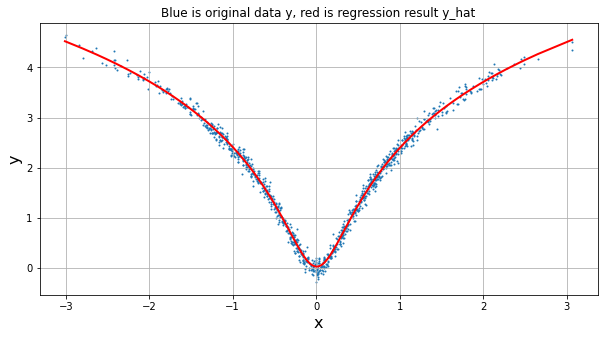

In [10]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 1)
L = sorted(zip(x,y_hat), key=operator.itemgetter(0))
new_x, new_y = zip(*L)
plt.plot(new_x, new_y, color='red', linewidth=2)
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid()
plt.show()

# Polynomial regression with Scikit-learn: A pipeline approach

In [11]:
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = x[:,np.newaxis]
poly_regression.fit(x_input, np.exp(y))
y_hat = np.log(poly_regression.predict(x_input))

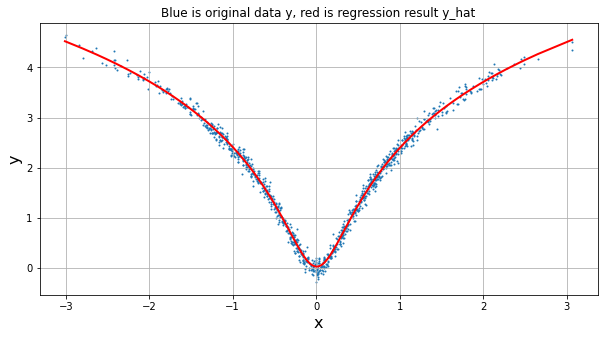

In [12]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 1)
L = sorted(zip(x,y_hat), key=operator.itemgetter(0))
new_x, new_y = zip(*L)
plt.plot(new_x, new_y, color='red', linewidth=2)
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid()
plt.show()